### Fundamentos de Data Science
#### Analizando los Salarios en Ciencia de Datos en 2023

1. Cargamos los datos y EDA

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos el DataFrame con pandas
df = pd.read_csv('../data/ds_salaries.csv')

In [3]:
#Exploracion basica de datos
#Columnas y primeras filas
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


2. Limpieza de datos con Python

In [4]:
#Explaramos si hay datos nulos en el dataset
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

#This sectiom of code was provided by the profesor when working a ejercicio_integracion_1.ipynb availablein the clae repostory.
#No hay valores nulos en este dataset, Ttambien podemos confirmar este desde la seccon de columns del dataset en Kaggle



,datos sin NAs en q,Na en q,Na en %
work_year,3755,0,0.0
experience_level,3755,0,0.0
employment_type,3755,0,0.0
job_title,3755,0,0.0
salary,3755,0,0.0
salary_currency,3755,0,0.0
salary_in_usd,3755,0,0.0
employee_residence,3755,0,0.0
remote_ratio,3755,0,0.0
company_location,3755,0,0.0


In [5]:
#Verificamos los tipos de datos
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
#Verificamos valores duplicados. En este caso, no puedo usar solo una columna como valores unico para detectar duplicados.

verificar_duplicates = df[['employment_type','employee_residence', 'job_title', 'experience_level', 'salary_in_usd']].duplicated()
print(verificar_duplicates)


0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool


In [8]:
#Verificamos Consistencia en valores categóricos

valores_unicos_calumnas_categoricas = df[['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']].apply(lambda x: x.unique())

print(valores_unicos_calumnas_categoricas)


experience_level                                       [SE, MI, EN, EX]
employment_type                                        [FT, CT, FL, PT]
job_title             [Principal Data Scientist, ML Engineer, Data S...
salary_currency       [EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ...
employee_residence    [ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C...
company_location      [ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F...
company_size                                                  [L, S, M]
dtype: object


In [9]:
# Verifucamos valores unicos por categoria.
unique_values = df.iloc[:, [1, 2, 3, 5, 7, 9, 10]].apply(pd.Series.unique)

print(unique_values)


experience_level                                       [SE, MI, EN, EX]
employment_type                                        [FT, CT, FL, PT]
job_title             [Principal Data Scientist, ML Engineer, Data S...
salary_currency       [EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ...
employee_residence    [ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C...
company_location      [ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F...
company_size                                                  [L, S, M]
dtype: object


3. Detección de datos anómalos

In [10]:
#Calculamos el rango de salrios por work expirience and check if the are values that are out of range

work_expirience_salary_in_usd = df.groupby('experience_level')['salary_in_usd'].agg(['mean','sum','count', 'std']).round(2).sort_values(by='mean', ascending=True)
print(work_expirience_salary_in_usd)

#Esta metrica no me esta dando mucha informacion relevante, sin ver si existen valores atipicos en las categorias de salarios

                       mean        sum  count       std
experience_level                                       
EN                 78546.28   25134811    320  52225.42
MI                104525.94   84143381    805  54387.69
SE                153051.07  385076496   2516  56896.26
EX                194930.93   22222126    114  70661.93


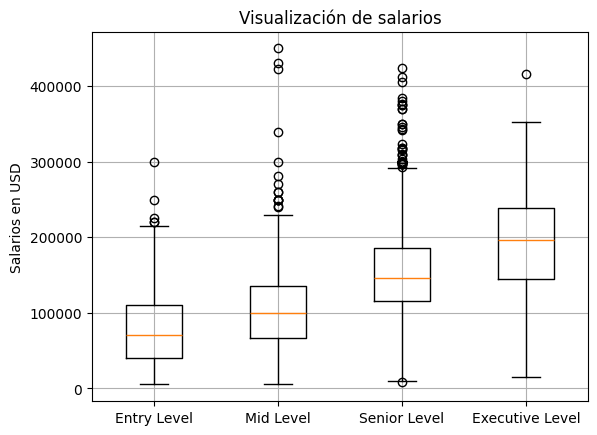

In [11]:
#Gracifamos con Boxplots para ver valores atipicos
datos_EN = df[df['experience_level'] == 'EN']['salary_in_usd']
datos_MI = df[df['experience_level'] == 'MI']['salary_in_usd']
datos_SE = df[df['experience_level'] == 'SE']['salary_in_usd']
datos_EX = df[df['experience_level'] == 'EX']['salary_in_usd']

#Creamos el boxplot
#Labels was renamed tick_labels

plt.boxplot([datos_EN, datos_MI, datos_SE, datos_EX], tick_labels=['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level'])
plt.title('Visualización de salarios')
plt.ylabel('Salarios en USD')
plt.grid(True)
plt.show()



In [12]:
#Identificar los outliers and limite inferior y superior

#Este fue el desarrollo de la lgica de loop para el nuevo dataframe
#Q1_EN = (datos_EN).quantile(0.25)
#Q3_EN= (datos_EN).quantile(0.75)
#IQR_EN= Q3_EN - Q1_EN

#Limite EN
#limite_bajo_EN = Q1_EN - 1.5 * IQR_EN
#limite_alto_EN = Q3_EN + 1.5 * IQR_EN

# Calculate 25% percentile (Q1) and 75% percentile (Q3) para datos_MI
#Q1_MI = (datos_MI).quantile(0.25)
#Q3_MI = (datos_MI).quantile(0.75)
#IQR_MI = Q3_MI - Q1_MI

#limite_bajo_MI = Q1_MI - 1.5 * IQR_MI
#limite_alto_MI = Q3_MI + 1.5 * IQR_MI

# Calculate 25% percentile (Q1) and 75% percentile (Q3) para datos_SE
#Q1_SE = (datos_SE).quantile(0.25)
#Q3_SE = (datos_SE).quantile(0.75)
#IQR_SE = Q3_SE - Q1_SE

#limite_bajo_SE = Q1_SE - 1.5 * IQR_SE
#limite_alto_SE = Q3_SE + 1.5 * IQR_SE

# Calculate 25% percentile (Q1) and 75% percentile (Q3) para datos_EX
#Q1_EX= (datos_EX).quantile(0.25)
#Q3_EX = (datos_EX).quantile(0.75)
#
# IQR_EX = Q3_EX - Q1_EX

#limite_bajo_EX = Q1_EX - 1.5 * IQR_EX
#limite_alto_EX = Q3_EX + 1.5 * IQR_EX

#print(f'IQR_EN: {IQR_EN}')
#print(f'IQR_MI: {IQR_MI}')
#print(f'IQR_SE: {IQR_SE}')
#print(f'IQR_EX: {IQR_EX}')


In [13]:
# Calculamos los outliers de salary_in_usd por cada expirience_level

sin_outliers = pd.DataFrame()


#Crearmos un loop para calculos el limite inferior, limite superor y IQR por cada expirience_level
for nivel_experiencia in df['experience_level'].unique():
    nivel_df = df[df['experience_level'] == nivel_experiencia]

    Q1 = nivel_df['salary_in_usd'].quantile(0.25)
    Q3 = nivel_df['salary_in_usd'].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    #Filtramos los valores que cumplan con los limites inferior y superior. Excluimos lo que este fuera de rango
    df_filtrada_experiencia = nivel_df[(nivel_df['salary_in_usd'] >= limite_inferior) & (nivel_df['salary_in_usd'] <= limite_superior)]

    #Unimos el dataframe de los valores filtrados al nuevo dataframe
    sin_outliers = pd.concat([sin_outliers, df_filtrada_experiencia])

#Imprimimos el data frame
print(sin_outliers)


      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
...         ...              ...             ...                       ...   
3558       2021               EX              FT           BI Data Analyst   
3559       2020               EX              FT             Data Engineer   
3643       2021               EX              FT  Director of Data Science   
3660       2021               EX              FT   Data Science Consultant   
3697       2020               EX              FT  Director of Data Science   

      salary salary_currency  salary_in_usd employee_residence 

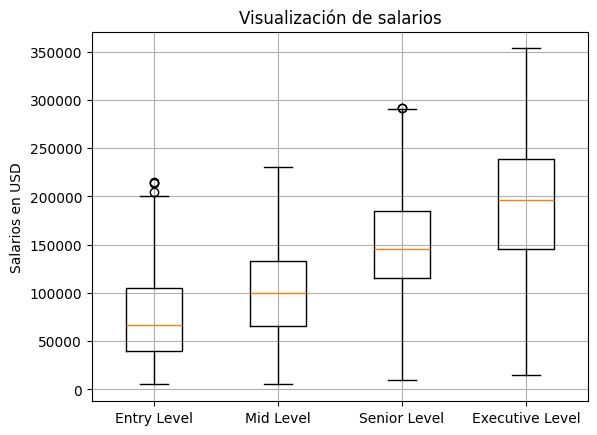

In [14]:
#Volvemos a graficar con Boxplots para comprobar que los outliners fueron excluidos
datos_EN2 = sin_outliers[sin_outliers['experience_level'] == 'EN']['salary_in_usd']
datos_MI2 = sin_outliers[sin_outliers['experience_level'] == 'MI']['salary_in_usd']
datos_SE2 = sin_outliers[sin_outliers['experience_level'] == 'SE']['salary_in_usd']
datos_EX2= sin_outliers[sin_outliers['experience_level'] == 'EX']['salary_in_usd']

plt.boxplot([datos_EN2, datos_MI2, datos_SE2, datos_EX2], tick_labels=['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level'])
plt.title('Visualización de salarios')
plt.ylabel('Salarios en USD')
plt.grid(True)
plt.show()

In [15]:
#Verificamos la informacion de nuestro nuevo DataFrame
sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3689 entries, 0 to 3697
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3689 non-null   int64 
 1   experience_level    3689 non-null   object
 2   employment_type     3689 non-null   object
 3   job_title           3689 non-null   object
 4   salary              3689 non-null   int64 
 5   salary_currency     3689 non-null   object
 6   salary_in_usd       3689 non-null   int64 
 7   employee_residence  3689 non-null   object
 8   remote_ratio        3689 non-null   int64 
 9   company_location    3689 non-null   object
 10  company_size        3689 non-null   object
dtypes: int64(4), object(7)
memory usage: 345.8+ KB


3. Exploración de datos con Python:

- Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


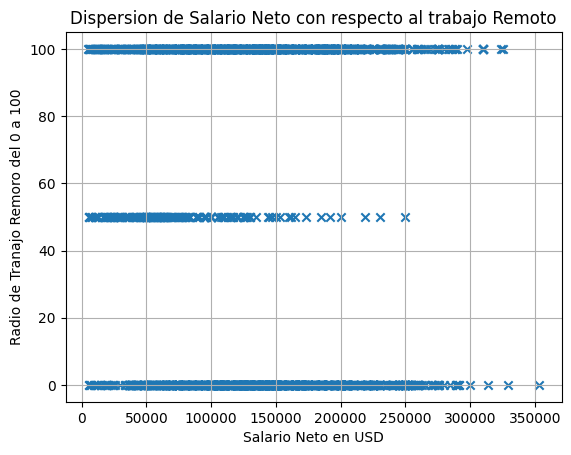

Análisis:
Podemos observar que los empleados con un radio de trabajo remoto del 100 tienen una dispersión más densa entre 0 y 150K USD; aun así, algunos valores llegan a aproximadamente 325K USD.

Para empleados con un radio de 50, la dispersión es más densa en el rango de 0 a 95K USD, y algunos valores llegan a 250K USD.

Para un radio de 0, no se puede observar una dispersión significativa; los valores se distribuyen desde 0 hasta 250K USD, y algunos pueden llegar hasta 350K USD.

Con estas observaciones, no se pueden llegar a suposiciones.


In [16]:
#Creamos un grafico de dispersion del remote radio con respencto al salario

plt.scatter(x='salary_in_usd', y='remote_ratio', data = sin_outliers, marker = 'x')

plt.xlabel('Salario Neto en USD')
plt.ylabel('Radio de Tranajo Remoro del 0 a 100')
plt.title('Dispersion de Salario Neto con respecto al trabajo Remoto')
plt.grid(True)
plt.show()

#Analisis
Analisis = (
    "Podemos observar que los empleados con un radio de trabajo remoto del 100 tienen una dispersión más densa entre 0 y 150K USD; aun así, algunos valores llegan a aproximadamente 325K USD.\n"
    "\n"
    "Para empleados con un radio de 50, la dispersión es más densa en el rango de 0 a 95K USD, y algunos valores llegan a 250K USD.\n"
    "\n"
    "Para un radio de 0, no se puede observar una dispersión significativa; los valores se distribuyen desde 0 hasta 250K USD, y algunos pueden llegar hasta 350K USD.\n"
    "\n"
    "Con estas observaciones, no se pueden llegar a suposiciones."
)

print(f'Análisis:\n{Analisis}')



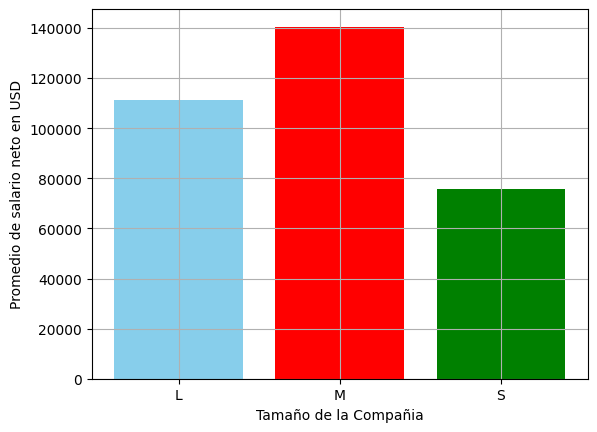

Análisis:
Podemos observar que el Salario en USD no necesariamente aumenta con el tamaño de la Compañia.
Podemos ver que el rango de salario mayor corresponde a empresas de mediano tamaño, seguido de empresas de mayor tampaño.
En ultimo lugar, tenemos a la empresas de menor tamaño


In [17]:
#Creamos un grafrico del salario neto en usd con repecto al company size

promedio_compañia = sin_outliers.groupby(['company_size'])['salary_in_usd'].mean().reset_index()
colores = ['skyblue', 'red', 'green'] 

plt.bar(promedio_compañia['company_size'],promedio_compañia['salary_in_usd'], color=colores )
plt.xlabel('Tamaño de la Compañia')
plt.ylabel('Promedio de salario neto en USD')
plt.grid(True) 
plt.show()

#Analisis
Analisis2 = (
    "Podemos observar que el Salario en USD no necesariamente aumenta con el tamaño de la Compañia."
    "\n"
    "Podemos ver que el rango de salario mayor corresponde a empresas de mediano tamaño, seguido de empresas de mayor tampaño.\n"
    "En ultimo lugar, tenemos a la empresas de menor tamaño"

)

print(f'Análisis:\n{Analisis2}')


#Codig base: Coding Dojo Analisis Exploratorio de Datos(EDA)

- Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

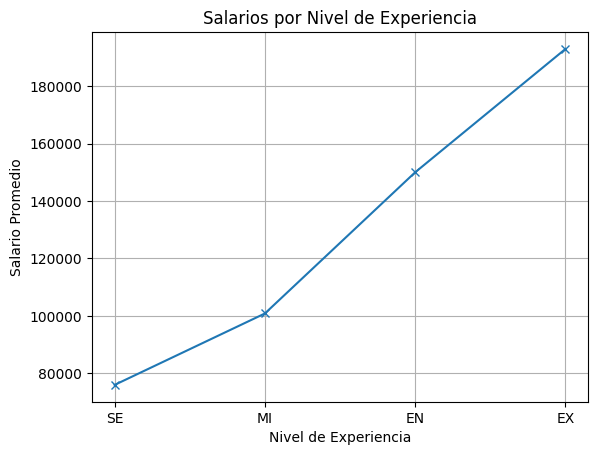

Analisis: Los datos sugieren que el salario neto en USD tiende a aumentar con la experiencia, lo cual es consistente con las expectativas del mercado.


In [18]:
#Graficamos el salario con respecto al Nivel de Experiencia

#Definimos x e y. Determinamos el primedio por cada nivel de experiencia
x = sin_outliers['experience_level'].unique()
y = [
    sin_outliers[sin_outliers['experience_level'] == 'EN']['salary_in_usd'].mean(),
    sin_outliers[sin_outliers['experience_level'] == 'MI']['salary_in_usd'].mean(),
    sin_outliers[sin_outliers['experience_level'] == 'SE']['salary_in_usd'].mean(),
    sin_outliers[sin_outliers['experience_level'] == 'EX']['salary_in_usd'].mean()
]

plt.plot(x, y, marker='x', label='Promedio de Salario Neto')
plt.title("Salarios por Nivel de Experiencia")
plt.xlabel("Nivel de Experiencia")
plt.ylabel("Salario Promedio")
plt.grid(True)
plt.show()

Analisis3 = ('Los datos sugieren que el salario neto en USD tiende a aumentar con la experiencia, lo cual es consistente con las expectativas del mercado.')
print(f'Analisis: {Analisis3}')

#Codigo base de ejercio de visualizaciones desarrollado en clase

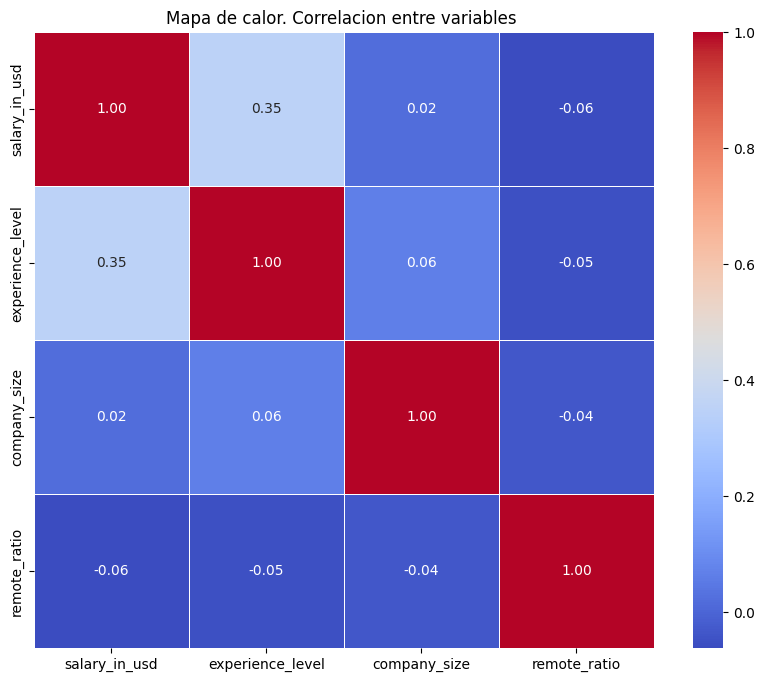

Análisis:

Podemos opbservar que el Radio del Trabajo Remoto esta relacionado con el Salario en USD, este disminuyendo miestrar el otro sube. 
Como esperamos, tambien se puede observar que el Salario en USD incrementa con el nivel de experiencia.

Observando el parametro de Company Size, podemos ver que mientras el tamaño aumenta, el radio de trabajo remoto disminute,

este tampoco guarda relacion con el aumento de salario en USD.


In [19]:
#Creamos un mapa de calor con variales relacionables de nuestro dataset. 
#Durante la definicion de Data, VS genero un error y sugerio usar iloc para completar la informacion. 

data = sin_outliers[['salary_in_usd', 'experience_level', 'company_size', 'remote_ratio']]

# Convertimos variables categóricas en variables numéricas para el cálculo de correlación
# Convertimos expirience_level y company_size 
data.loc[:, 'experience_level'] = data['experience_level'].astype('category').cat.codes
data.loc[:, 'company_size'] = data['company_size'].astype('category').cat.codes

# Calculamos la matriz de correlación
correlation_matrix = data.corr()

# Creamos el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor. Correlacion entre variables ')
plt.show()

#Codigo base de Coding Dojo: Heatmap y correlacion

#Analisis
Analisis_4 = (
    "Podemos opbservar que el Radio del Trabajo Remoto esta relacionado con el Salario en USD, este disminuyendo miestrar el otro sube. "
    "\n"
    "Como esperamos, tambien se puede observar que el Salario en USD incrementa con el nivel de experiencia.\n"
    "\n"
    "Observando el parametro de Company Size, podemos ver que mientras el tamaño aumenta, el radio de trabajo remoto disminute,\n"
    "\n"
    "este tampoco guarda relacion con el aumento de salario en USD."
)

print("Análisis:\n")
print(Analisis_4)

4. Análisis adicional:
- Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
- Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [20]:
#Estadisticas descriptivas
#Calculamos la media Media, Promedio, y Desviacion Standard del DataFrame de Salrio por Tipo de Empleado

Estadisticas_descriptivas = sin_outliers.groupby('employment_type')['salary_in_usd'].agg(median='median', std ='std')

print(Estadisticas_descriptivas)

                   median           std
employment_type                        
CT                45234.5  38021.243058
FL                50000.0  29458.879336
FT               135000.0  58034.865672
PT                21669.0  38312.145181


                     mean  median       std
employment_type                            
CT               1.750000     2.0  1.164965
FL               1.900000     2.0  1.100505
FT               2.481390     3.0  0.894096
PT               0.352941     0.0  0.785905


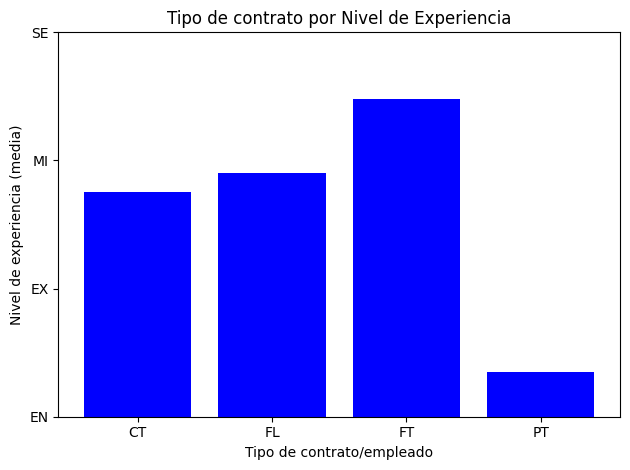

Análisis:

Podemos observar que la cantidad de experiencia puede estar relacionada con el tipo de trabajo, especialmente en el caso de los empleados de nivel de entrada.

Además, notamos que los empleados a tiempo completo tienden a tener niveles de experiencia medios y senior.

Por otro lado, en las categorías de nivel ejecutivo, se observa una mayor tendencia hacia el trabajo freelance.


In [21]:
# Convertimos los valores de Expirience_level a valores numericos
sin_outliers['experience_level_category'] = sin_outliers['experience_level'].astype('category').cat.codes

# Calculamos medidas en base experiencia contra tipo de contrato
Estadisticas_descriptivas_2 = sin_outliers.groupby(['employment_type'])['experience_level_category'].agg(mean='mean', median='median', std='std')

print(Estadisticas_descriptivas_2)

plt.bar(Estadisticas_descriptivas_2.index, Estadisticas_descriptivas_2['mean'], color='blue', label='Mean')
y_ticks = np.arange(0, sin_outliers['experience_level_category'].max() + 1, 1)  
y_tick_labels = sin_outliers['experience_level'].astype('category').cat.categories  
plt.yticks(y_ticks, y_tick_labels[:len(y_ticks)])
plt.title('Tipo de contrato por Nivel de Experiencia')
plt.xlabel('Tipo de contrato/empleado')
plt.ylabel('Nivel de experiencia (media)')
plt.tight_layout()
plt.show()


#Analisis
Analisis_5 = (
    "Podemos observar que la cantidad de experiencia puede estar relacionada con el tipo de trabajo, "
    "especialmente en el caso de los empleados de nivel de entrada.\n"
    "\n"
    "Además, notamos que los empleados a tiempo completo tienden a tener niveles de experiencia medios y senior.\n"
    "\n"
    "Por otro lado, en las categorías de nivel ejecutivo, se observa una mayor tendencia hacia el trabajo freelance."
)

print("Análisis:\n")
print(Analisis_5)

#Codigo base: Pandas y Visualizacion
#Matplotlib documentacios

In [22]:
#Datos de Company Size por Remote Radio
Estadisticas_descriptivas_2 = sin_outliers.groupby('company_size')['remote_ratio'].describe()

print('Estadisticas descriptivas_2')
print(Estadisticas_descriptivas_2)

Estadisticas descriptivas_2
               count       mean        std  min   25%    50%    75%    max
company_size                                                              
L              438.0  60.844749  42.274775  0.0   0.0   50.0  100.0  100.0
M             3104.0  43.121778  49.148895  0.0   0.0    0.0  100.0  100.0
S              147.0  72.108844  38.432137  0.0  50.0  100.0  100.0  100.0


               count           mean           std     min       25%       50%  \
company_size                                                                    
L              438.0  111200.255708  64352.514598  5409.0   60000.0  105468.0   
M             3104.0  140517.819588  55344.607770  5132.0  101097.5  139500.0   
S              147.0   75928.904762  55479.459258  5679.0   35336.0   61566.0   

                   75%       max  
company_size                      
L             154545.0  325000.0  
M             175025.0  353200.0  
S             106154.5  275000.0  


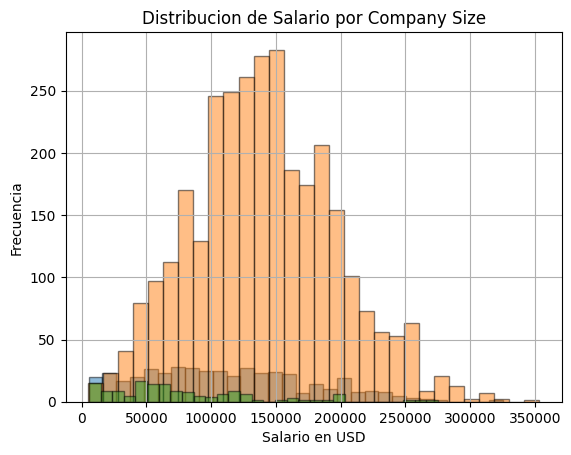

Análisis:

Podemos observar que la mayor frecuencia de los salarios ganados por los empleados se encuentra en el rango de 100K a 200K USD.
La frecuencia es moderada para los salarios de 50K a 100K USD. Por último,
observamos una disminución notable en la frecuencia de salarios por encima de 250K USD.


In [23]:
#Datos de Company Size por Salario USD
Estadisticas_descriptivas_3 = sin_outliers.groupby('company_size')['salary_in_usd'].describe()

print(Estadisticas_descriptivas_3)

#Histograma de distrbucion de Salarios por Campany Size
for company in sin_outliers['company_size'].unique():
    subset = sin_outliers[sin_outliers['company_size'] == company]
    plt.hist(subset['salary_in_usd'], bins=30, alpha=0.5, label=str(company), edgecolor='black')
plt.title('Distribucion de Salario por Company Size')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#Analisis
Analisis_6 = (
    "Podemos observar que la mayor frecuencia de los salarios ganados por los empleados se encuentra en el rango de 100K a 200K USD.\n"
    "La frecuencia es moderada para los salarios de 50K a 100K USD. Por último,\n"
    "observamos una disminución notable en la frecuencia de salarios por encima de 250K USD."
)

print("Análisis:\n")
print(Analisis_6)

Recursos utilizados:
- Dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
- Creacion de TAG: https://stackoverflow.com/questions/18216991/create-a-tag-in-a-github-repository
- Codingdojo: Aplicacion de Funciones con el Metodo apply en Pandas
- Ejercicio_integracion_1 : 

- Chat GPT: Aclaracion de terminos y depuracion. Tambien para encontrar typos. 
- Sigificados de Work expirience siglas: https://medium.com/@nikhilpurao1998/data-scientist-job-salaries-analysis-f153717e2dbf
- Boxplot: https://datatab.net/tutorial/box-plot
- Removing outliers: https://python.plainenglish.io/identifying-and-handling-outliers-in-pandas-a-step-by-step-guide-fcecd5c6cd3b
- Que metodo usar para convertir los datos a valores numericos: https://stackoverflow.com/questions/77033740/whats-the-difference-between-astypecategory-categorical-and-factorize#:~:text=astype(%22category%22)%20%3A,data%20within%20a%20pandas%20DataFrame.
- Matplotlib: https://matplotlib.org/stable/api/matplotlib_configuration_api.html

